In [1]:
import matplotlib.pyplot as plt
import pyddm

#### **There are two ways to build models with PyDDM: the classic object-oriented interface, and the gddm() function.**

#### Here is the gddm() function discussed.

##### **The Components of the gddm() function:**


drift: the drift rate, i.e., the amount of evidence that would be accumulated in 1 sec if there was no noise.

noise: the noise level, i.e., the standard deviation of noise. By tradition, this is frequently set to 0.1 or 1.0. If not specified, it defaults to 1.0.

bound: the height of the boundary on each side. (So, the total separation of the boundaries will be twice this value.)

starting_position: the initial position of the diffusion process. A value of 1 indicates a starting position on the upper boundary, -1 on the bottom boundary, and 0 in between. (This differs from some other packages, which define 0 as the lower boundary and 1 as the upper boundary.)

nondecision: the non-decision time, in units of seconds. Both positive and negative values are valid (though usually you will want it to be positive).

mixture_coef: By default, PyDDM returns an RT distribution which is a mixture model of the GDDM RT distribution and the uniform distribution. This parameter defines the ratio of uniform distribution to GDDM RT distribution. Set to 0 to disable the mixture model. By default, this is 0.02. (Mixture models assist with model fitting when using maximum likelihood, which we will discuss later in this tutorial.)

In [12]:
model = pyddm.gddm(drift="d", noise=1.0, bound=0.6, starting_position=0.3, nondecision=0.2, parameters= {"d": (-2, 2)})

In [3]:
model.show()

Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fixed parameters:
    - drift: 0.500000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 0.600000
IC component ICPointRatio:
    An arbitrary starting point expressed as a proportion of the distance between the bounds.
    Fixed parameters:
    - x0: 0.300000
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fixed parameters:
        - nondectime: 0.200000
    Overlay component OverlayUniformMixture:
        Uniform distribution mixture model
        Fixed parameters:
        - umixturecoef: 0.020000



In [4]:
# Solving OR Simulating the model.
sol = model.solve()

In [5]:
# Model with Free parameters instead of constant ones.
model_to_fit = pyddm.gddm(drift="d", noise=1.0, bound ="B", nondecision=0.2,
                           starting_position="x0", parameters={"d": (-2,2), "B":(0.3, 2), "x0": (-.8, .8)})

In [6]:
model_to_fit.show()

Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fittable parameters:
    - drift: Fittable (default -0.723178)
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fittable parameters:
    - B: Fittable (default 1.412608)
IC component ICPointRatio:
    An arbitrary starting point expressed as a proportion of the distance between the bounds.
    Fittable parameters:
    - x0: Fittable (default -0.376964)
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fixed parameters:
        - nondectime: 0.200000
    Overlay component OverlayUniformMixture:
        Uniform distribution mixture model
        Fixed parameters:
        - umixturecoef: 0.020000



In [7]:
# We can viualize the model using the model GUI to make sure it behaves right.
import pyddm.plot

In [13]:
pyddm.plot.model_gui_jupyter(model) # jupyter if using the notebook.

Output()

In [ ]:
# Simulating observations.
samp_simulated = sol.sample(10000)

In [8]:
# Fitting the model above to recover parameters.
model_to_fit.fit(samp_simulated, lossfunction=pyddm.LossBIC, verbose=False)

Info: Params [0.53359442 0.5966303  0.27881176] gave 5320.636490039751


In [16]:
model_to_fit.show()

Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 0.500641
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fitted parameters:
    - B: 0.602638
IC component ICPointRatio:
    An arbitrary starting point expressed as a proportion of the distance between the bounds.
    Fitted parameters:
    - x0: 0.292100
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fixed parameters:
        - nondectime: 0.200000
    Overlay component OverlayUniformMixture:
        Uniform distribution mixture model
        Fixed parameters:
        - umixturecoef: 0.020000
Fit information:
    Loss function: BIC
    Loss function value: 5399.697006237305
    Fitting method: differential_evolution
    Solver: auto
    Other properties

In [9]:
# Obtaining the fitted parameters.
params = model_to_fit.parameters()

In [19]:
params

{'drift': {'drift': Fitted(0.5006414772660374, minval=-2, maxval=2)},
 'noise': {'noise': 1.0},
 'bound': {'B': Fitted(0.6026383823901109, minval=0.3, maxval=2)},
 'IC': {'x0': Fitted(0.2920997691398478, minval=-0.8, maxval=0.8)},
 'overlay': {'nondectime': 0.2, 'umixturecoef': 0.02}}

In [21]:
# To get the value of BIC
model_to_fit.get_fit_result().value()

5399.697006237305

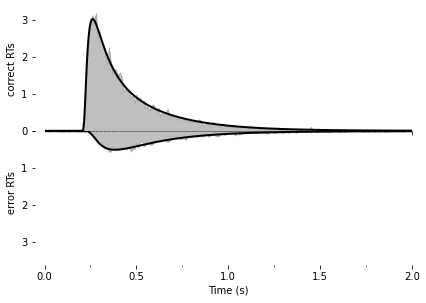

In [10]:
# Plot the model fit to the PDFs and save the file.

pyddm.plot.plot_fit_diagnostics(model=model_to_fit, sample=samp_simulated)
plt.savefig("simple-fit.png")
plt.show()

Using the Solution object sol we have access to a number of other useful functions. For instance, we can find the probability of a response using prob(), such as sol.prob("correct") for the probability of a correct response, or the entire histogram of responses using pdf(), such as sol.pdf("error") for the distribution of errors.

In [23]:
print(sol.prob("correct"))
print(sol.pdf("error"))

0.7684127047085341
[0.00497888 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888
 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888
 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888
 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888
 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888
 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888
 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888 0.00497888
 0.00497888 0.00497906 0.00499694 0.00524934 0.00654131 0.01025378
 0.01776636 0.02991125 0.04680417 0.0679705  0.0925778  0.11965128
 0.14822687 0.17744062 0.20656943 0.23504011 0.26242043 0.2884014
 0.31277674 0.33542266 0.35627969 0.37533715 0.39262034 0.4081803
 0.4220857  0.43441661 0.44525982 0.45470528 0.46284354 0.46976389
 0.47555312 0.48029459 0.48406777 0.48694788 0.48900579 0.49030798
 0.49091666 0.49088985 0.4902816  0.48914219 0.48751827 0.48545318
 0.48298705 0.48015709 0.47699775 0.47354092 

In [11]:
# Model components can be defined by functions.
# Name of the parameter should be an argument of the function.

In [12]:
mdodel_to_fit = pyddm.gddm(drift=lambda d : d, noise=1.0,
                           bound=lambda B : B, nondecision=0.2,
                           starting_position=lambda x0 : x0,
                           parameters={"d": (-2,2), "B": (0.3, 2), "x0": (-.8, .8)})

In [14]:
model_to_fit.show()

Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 0.533594
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fitted parameters:
    - B: 0.596630
IC component ICPointRatio:
    An arbitrary starting point expressed as a proportion of the distance between the bounds.
    Fitted parameters:
    - x0: 0.278812
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fixed parameters:
        - nondectime: 0.200000
    Overlay component OverlayUniformMixture:
        Uniform distribution mixture model
        Fixed parameters:
        - umixturecoef: 0.020000
Fit information:
    Loss function: BIC
    Loss function value: 5320.636490039751
    Fitting method: differential_evolution
    Solver: auto
    Other properties

In [19]:
model_to_fit.fit(samp_simulated, lossfunction=pyddm.LossBIC, verbose = False)

Info: Params [0.51789526 0.59841864 0.28572024] gave 5322.585912655252


In [23]:
model_to_fit.show()

Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 0.517895
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fitted parameters:
    - B: 0.598419
IC component ICPointRatio:
    An arbitrary starting point expressed as a proportion of the distance between the bounds.
    Fitted parameters:
    - x0: 0.285720
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fixed parameters:
        - nondectime: 0.200000
    Overlay component OverlayUniformMixture:
        Uniform distribution mixture model
        Fixed parameters:
        - umixturecoef: 0.020000
Fit information:
    Loss function: BIC
    Loss function value: 5322.585912655252
    Fitting method: differential_evolution
    Solver: auto
    Other properties

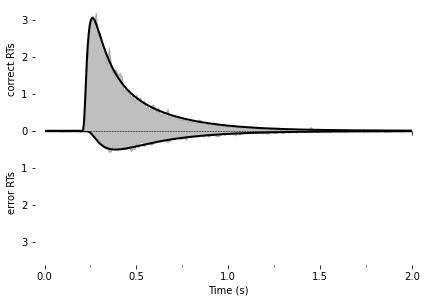

In [20]:
pyddm.plot.plot_fit_diagnostics(model=model_to_fit, sample=samp_simulated)
plt.savefig("simple-fit.png")
plt.show()

In [ ]:
# Adding Conditions to model.